# 排序算法对比

排序算法分为**基于比较的算法**和**非基于比较的算法**两大类，其中基于比较的算法时间复杂度下限为$O(n^2)$，算法的实现版本较多（如：插入排序、冒泡排序、归并排序、快速排序和堆排序）。而非基于比较的算法时间复杂度下限为$O(n)$，但是需要一些额外的先验条件和内存开销（如：桶排序）。  
下表列出了常用的排序算法的复杂度和应用场景：

|算法|时间复杂度|空间复杂度|稳定性|
|:----:|:------|:---------|:-------|
| **插入排序** (Insert sort) | $O(n^2)$ | $O(1)$ | 稳定 |
| **冒泡排序** (Bubble sort) | $O(n^2)$ | $O(1)$ |  稳定 |
| **归并排序** (Merge sort) | $O(n \cdot log_2^n)$| $O(n)$ | 稳定 |
| **快速排序** (Quick sort) | 最好：$O(n \cdot log_2^n)$ <br/> 最坏：$O(n^2)$  | 最好：$O(log_2^n)$ <br/> 最坏：$O(n)$ | 不稳定 |
| **堆排序** (Heap sort) | $O(n \cdot log_2^n)$ | $O(1)$ | 不稳定 |
| **桶排序** (Bucket sort) | $O(n)$ | $O(n+k)$ | 稳定 |

# 插入排序

## 算法思想

插入排序是一种较为简单和朴素的排序方法，它每次将一个**未排序的元素插入到已排序元素中正确的位置**，逐个的对序列中的元素进行排序。在插入排序的实现过程中需要两层循环，一层用于对每个元素执行插入操作，另一层用于为执行操作的元素寻找合适的插入位置，因此时间复杂度为 $O(n^2)$。插入排序算法可以直接对输入序列进行操作，不需要额外的储存空间，因此时间复杂度为 $O(1)$。  

## 算法特点

插入排序算法属于*基于比较的算法*，且排序结果具有稳定性（即：逻辑上相等的元素在原始输入序列中的相对位置不会改变）。在目前储存空间较为廉价，而 CPU 的运行速度遇到瓶颈的背景下，该算法不适用于大规模序列的排序，但由于算法实现简单，其时间复杂度前的常数项较小，因此在一些小规模问题上可能会更快速。

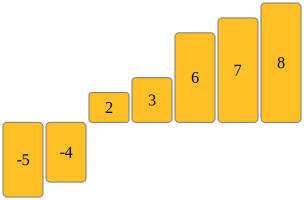

In [2]:
# 插入排序实现算法。
import algviz

def insertSort(nums_):
    viz = algviz.Visualizer(delay=2)
    nums = viz.createVector(data=nums_, bar=200, show_index=False)
    # 直接从第二个元素开始。
    for i in range(1, len(nums_)):
        ii = i
        for j in range(i+1):   # 该循环用于标记已排序的元素。
            nums.mark(j, algviz.colors[0])
        for j in range(i-1, -1, -1):
            if nums[ii] < nums[j]:
                nums.swap(ii, j)
                ii = j
                viz.display()
            else:
                viz.display(1)
                break
    viz.display(1)

case1 = [3, -4, 6, 2, -5, 8, 7]
insertSort(case1)

# 冒泡排序

## 算法思想

冒泡排序和插入排序较为相似，它通过多轮扫描过程依次比较两个相邻元素的大小，如果两个元素之间是逆序的，则交换两元素的位置。假设算法从前向后扫描，每次将相邻两个元素中较大的值放到后面，那么经过该轮扫描之后，扫描过的序列中的最大值将会跑到扫描序列最后的位置，重复执行扫描过程直到所有元素都被排序即可。

**时间复杂度：** 算法需要两层循环来比较和交换元素，因此时间复杂度为 $O(n^2)$。  
**空间复杂度：** 算法可以在原输入数组上进行操作，因此时间复杂度为 $O(1)$。

## 算法特点

属于基于比较的排序算法，排序结果具有稳定性，但无论输入数据的序列如何，算法都需要进行 $O(n^2)$ 次的比较操作，因此在部分算例上该算法不如插入排序算法高效。对于大规模算例，冒泡排序更是慢的让人头皮发麻。

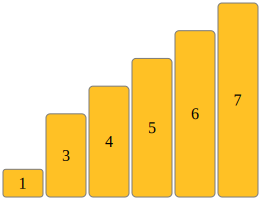

In [3]:
# 冒泡排序实现。
import algviz

def bubbleSort(nums_):
    viz = algviz.Visualizer(delay=2)
    nums = viz.createVector(data=nums_, bar=200, show_index=False)
    for i in range(len(nums_)):
        for j in range(len(nums_)-i-1):
            if nums[j] > nums[j+1]:
                nums.swap(j, j+1)
            viz.display()
        nums.mark(len(nums_)-i-1, algviz.colors[0])
    viz.display()
    
case2 = [7, 4, 3, 5, 1, 6]
bubbleSort(case2)

# 归并排序

## 算法思想

归并排序的思想来源于分治思想(Divide and Conquer)，分治思想包含了分割、解决和合并三个过程，下面是归并排序算法在这三个过程中的具体操作：

1. **分割：** 将要排序的序列分割成两段（一般是从中间分割），得到两个子问题。
2. **解决：** 对子问题递归的调用归并排序算法，直到子问题可以被直接解决（即子问题中只剩两个以下元素，则可以被直接比较）。
3. **合并：** 对排好顺序的子序列进行合并，从而得到原始问题的排序结果，这里通过 `merge` 操作来合并子序列，该过程也是归并排序的核心过程。

`merge` 操作每次从两个子序列的头部取出较小的元素，然后放入结果序列中，直到子序列中所有的元素都被取出为止，最后返回排序好的结果。

## 复杂度分析

+ **时间复杂度：** 我们可以借助**递归树**来分析算法的时间复杂度，递归树的最大深度为 $O(log_2^n)$，在每一层的合并操作中需要 $O(n)$ 次的基本操作，因此算法的时间复杂度为 $O(n \cdot log_2^n)$。

    ![归并排序时间辅助度分析递归树](https://s1.ax1x.com/2020/05/25/t98i11.jpg)

+ **空间复杂度：** 递归过程中的压栈深度为 $O(log_2^n)$，合并过程中需要 $O(n)$ 的辅助空间来保存合并结果，因此空间复杂度为 $O(log_2^n) + O(n)$，等价于 $O(n)$。

## 算法特点

归并排序属于基于比较的排序算法，它不仅比较稳定，在时间上也是非常高效的，但是这种算法很消耗空间，所以通常我们在**外部排序**中使用归并排序，而在**内部排序**中使用快速排序取代之。

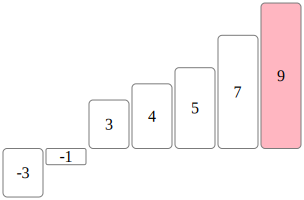

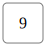

In [1]:
# 归并排序实现。
import algviz

class MergeSort():
    '''
    nums_:list() 要排序的数组。
    '''
    def __init__(self, nums_):
        self.viz = algviz.Visualizer()
        self.nums = self.viz.createVector(nums_, name='OriginNums', bar=200, show_index=False)
        self.merge_res = self.viz.createVector(name='TempMergeNums', show_index=False)
        self.solve(0, len(nums_))
    
    '''
    l,r:int 排序数组的左右边界（左闭右开）。
    '''
    def solve(self, l, r):
        if l < r - 1:
            m = (l + r)//2
            self.solve(l, m)
            self.solve(m, r)
            self.merge(l, m, r)
    
    '''
    l,m,r:int 合并序列的左边界、中间分割点和右边界。
    '''
    def merge(self, l, m, r):
        # 标记正在处理的子序列。
        for i in range(l, r):
            self.nums.mark(i, algviz.colors[0])
        # 依次取出子序列中较小的元素放置到缓存数组中。
        ll, mm = l, m
        while ll < m and mm < r:
            if self.nums[ll] > self.nums[mm]:
                self.merge_res.append(self.nums[mm])
                mm += 1
            else:
                self.merge_res.append(self.nums[ll])
                ll += 1
            self.viz.display()
        while ll < m:
            self.merge_res.append(self.nums[ll])
            ll += 1
            self.viz.display()
        while mm < r:
            self.merge_res.append(self.nums[mm])
            mm += 1
            self.viz.display()
        # 清除标记。
        self.nums.removeMark(algviz.colors[0])
        # 将排好序的数组复制到元素序列中。
        for i in range(l, r):
            self.nums[i] = self.merge_res.pop(0)
            self.viz.display()
            
case3 = [3, -1, 4, 7, 5, 9, -3]
solver = MergeSort(case3)

# 快速排序

## 算法思想

快速排序同样使用了分治的思想，它使用了基数对子序列进行分割，并保证基数左边的序列都小于基数，而基数右边的序列都大于基数，然后对基数左右的子序列递归的分别调用快速排序算法，直到子序列中只剩一个元素。  
对比归并排序可以发现，快速排序只使用了分治思想中的**分割**和**解决**过程，在使用基数划分子序列的过程中，实际上已经进行了排序工作，这说明分治思想的应用是非常灵活的，不同的算法可以根据实际特点进行灵活调整。

## 复杂度分析

+ **时间复杂度：** 同样使用递归树进行分析，在递归树的每一层所需要进行的划分操作都为 $O(n)$ ，但由于**在快速排序中，子序列的划分不一定是左右平衡的，这跟基数的选择有关**，所以递归树的深度是不确定的。如果我们足够幸运，在每次的划分中左右两个子序列的长度都刚好是相等的，那么递归树的深度就是 $O(log_2^n)$，但如果我们足够倒霉，每次划分时其中一个子序列的长度都为0，那么递归树的深度就是 $O(n)$，因此，快速排序的时间复杂度在 $O(n \cdot log_2^n)$ ~ $O(n^2)$ 之间。幸运的时，实际情况中要排序的序列往往是均匀分布的，如果我们随机的选择基数进行划分，那么递归树大概率是平衡的，所以实际情况中快速排序的时间复杂度接近于 $O(n \cdot log_2^n)$。
+ **空间复杂度：** 子序列的划分过程可以在原始数组中进行，所需要的内存空间为常数，因此快速排序算法的空间复杂度只与递归树的深度有关。在时间复杂度的分析中，我们得出了递归树的深度在 $O(log_2^n)$ ~ $O(n)$ 之间，因此空间复杂度也是该范围。

## 算法特点

在基于比较的排序算法中，快速排序的时间效率是最高的，而在实际的应用场景中，它所需要的储存空间也比归并排序少，因此快速排序在处理大规模问题的求解过程中有很大优势。但是快排算法是不稳定的，所以在对稳定性有要求的场景中不能使用快排算法。

# 堆排序

# 桶排序

# 参考链接

+ [十大经典排序算法+动图演示](https://www.cnblogs.com/onepixel/articles/7674659.html)
+ [VisuAlgo算法可视化网站](https://visualgo.net/en)
+ https://www.geeksforgeeks.org/merge-sort/